# Bài toán dự đoán, phân tích và trực quan hóa tuổi thọ, các yếu tố ảnh hưởng đến tuổi thọ dựa trên bộ dự liệu toàn cầu


---
Nguyễn Thị Thu Hồng - 52100962

Ao Thụy Ngọc Trân - 52100937

Vũ Thị Hà Vy - 52100742



---
BÀI 2

Đưa ra một bài toán dự đoán có thể giải quyết bằng học máy (machine leanring) với các yêu cầu sau:
-	Số Feature/Attribute gồm nhiều kiểu: categorial và numerical;
-	Dữ liệu phải chưa được học, thực tập trên lớp và trong bài tập về nhà;

1)	Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán;

2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing;

3)	Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán;

4)	Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán;

5)	Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không.


---




* Dữ liệu được chọn: Global Country Information Dataset 2023

Data Source: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023



Các Feature chính của bộ dữ liệu:
* Country : Tên quốc gia.
* Density (P/Km2) : Mật độ dân số tính bằng người trên kilômét vuông.
* Abbreviation : Viết tắt hoặc mã đại diện cho quốc gia.
* Agricultural Land (%) : Tỷ lệ diện tích đất được sử dụng vào mục đích nông nghiệp.
* Land Area (Km2) : Tổng diện tích đất liền cả nước tính bằng km2.
* Armed Forces Size : Quy mô của lực lượng vũ trang trong nước.
* Birth Rate : Số ca sinh trên 1.000 dân mỗi năm.
* Calling Code : Mã gọi quốc tế của quốc gia.
* Capital/Major City : Tên thủ đô hoặc thành phố lớn.
* CO2 Emissions : Lượng khí thải carbon dioxide tính bằng tấn.
* CPI : Chỉ số giá tiêu dùng, thước đo lạm phát và sức mua.
* CPI Change (%) : Phần trăm thay đổi của Chỉ số giá tiêu dùng so với năm trước.
* Currency_Code : Mã tiền tệ được sử dụng trong nước.
* Fertility Rate : Số con trung bình mà một phụ nữ sinh ra trong suốt cuộc đời.
* Forested Area (%) : Tỷ lệ diện tích đất được bao phủ bởi rừng.
* Gasoline_Price : Giá xăng mỗi lít bằng nội tệ.
* GDP : Tổng sản phẩm quốc nội, tổng giá trị hàng hóa và dịch vụ được sản xuất trong nước.
* Gross Primary Education Enrollment (%) : Tỷ lệ nhập học chung cho giáo dục tiểu học.
* Gross Tertiary Education Enrollment (%) : Tỷ lệ tuyển sinh chung cho giáo dục đại học.
* Infant Mortality : Số ca tử vong trên 1.000 ca sinh sống trước khi được một tuổi.
* Largest City : Tên thành phố lớn nhất đất nước.
* Life Expectancy : Số năm trung bình mà một đứa trẻ sơ sinh có thể sống được.
* Maternal Mortality Ratio : Số ca tử vong mẹ trên 100.000 ca sinh sống.
* Minimum Wage : Mức lương tối thiểu bằng nội tệ.
* Official Language : (các) ngôn ngữ chính thức được sử dụng trong nước.
* Out of Pocket Health Expenditure (%) : Tỷ lệ phần trăm trong tổng chi tiêu y tế do cá nhân tự trả.
* Physicians per Thousand : Số bác sĩ trên một nghìn dân.
* Population : Tổng dân số cả nước.
* Population: Labor Force Participation (%) : Tỷ lệ phần trăm dân số là một phần của lực lượng lao động.
* Tax Revenue (%) : Doanh thu thuế tính theo phần trăm GDP.
* Total Tax Rate : Gánh nặng thuế tổng thể tính theo phần trăm lợi nhuận thương mại.
* Unemployment Rate : Tỷ lệ phần trăm lực lượng lao động bị thất nghiệp.
* Urban Population : Tỷ lệ dân số sống ở khu vực thành thị.
* Latitude : Tọa độ vĩ độ của vị trí quốc gia.
* Longitude : Tọa độ kinh độ của vị trí đất nước.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/world-data-2023.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [5]:
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


**1) Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán.**

**Data Inspection _ Kiểm tra dữ liệu**

Kiểm tra ba khía cạnh của tập dữ liệu:

1.   Kiểu dữ liệu của mỗi cột
    
    *Chúng ta có thể xác định các loại dữ liệu cần thay đổi.*
2.   Số giá trị duy nhất trong mỗi cột

    *Ví dụ: chúng ta có thể xác định các biến nhị phân—các cột chỉ chứa hai giá trị duy nhất.*
3.  Thiếu giá trị trong từng cột
    
    *Chúng tôi có thể xác định các cột bị thiếu lượng dữ liệu tương đối lớn.*



In [7]:
# Kiểu dữ liệu của mỗi cột
print('Data Types:\n', data.dtypes, '\n')

# Số giá trị duy nhất trong mỗi cột
print('Unique Values:')
for column in data.columns:
    print(f'{column}:', len(data[column].unique()))

# Thiếu giá trị trong từng cột
missing = data.isnull().sum()
print('\nMissing Values:\n', missing)

# In năm hàng đầu tiên của tập dữ liệu để có thể kiểm tra dữ liệu.
print('\nFirst Five Rows:')
data.head()

Data Types:
 Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollme

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


Sau khi kiểm tra dữ liệu, ta xác định hai vấn đề:

    Dữ liệu bao gồm cả chữ hoa và chữ thường.
    Một số biến liên tục thuộc loại object.

**Data Cleaning _ Làm sạch dữ liệu**

Chúng ta có thể làm sạch dữ liệu như sau:

1.  Chuyển đổi tên cột thành chữ thường
    
    *Chúng ta sẽ không cần lo lắng về chữ hoa khi gõ tên cột.*

2.  Chuyển đổi các mục thành chữ thường
    
    *Ví dụ: 'Germany' và 'germany' sẽ không hoạt động như những danh mục riêng biệt.*

3.  Loại bỏ khoảng trắng ở cuối

    *Ví dụ: 'germany' và 'germany ' sẽ không hoạt động như các danh mục riêng biệt.*

4.  Thay đổi kiểu dữ liệu khi thích hợp

    *Ví dụ: Gross primary education enrollment (%), có thể được thay đổi từ loại object sang loại float để tạo điều kiện thuận lợi cho việc phân tích và trực quan hóa.*

In [ ]:
DataSet = data

NumericalVariables = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

# Thay đổi kiểu dữ liệu khi thích hợp
for variable in NumericalVariables:
    if (DataSet[variable].dtypes == 'object'):
        DataSet[variable] = DataSet[variable].str.replace(',', '')
        DataSet[variable] = DataSet[variable].str.replace('%', '')
        DataSet[variable] = DataSet[variable].str.replace('$', '')
        DataSet[variable] = DataSet[variable].astype(float)

for variable in NumericalVariables:
    DataSet[variable].fillna(DataSet[variable].mean(), inplace=True)

DataSet.sample(10)

<ipython-input-308-5e96da0d7825>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DataSet[variable] = DataSet[variable].str.replace('$', '')


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
128,North Macedonia,83.0,NaN,39.117553,25713.0,159274.853801,20.214974,389.0,Skopje,177799.239362,...,35.600000,1.83984,1836713.0,62.738068,16.573964,40.822404,6.886364,2.230454e+07,41.608635,21.745275
137,Peru,26.0,PE,18.500000,1285216.0,158000.000000,17.950000,51.0,Lima,57414.000000,...,30.900000,1.27000,32510453.0,77.600000,14.300000,36.800000,3.310000,2.539034e+07,-9.189967,-75.015152
73,Vatican City,2003.0,NaN,39.117553,0.0,159274.853801,20.214974,379.0,Vatican City,177799.239362,...,32.637234,1.83984,836.0,62.738068,16.573964,40.822404,6.886364,2.230454e+07,41.902916,12.453389
43,Cyprus,131.0,CY,12.200000,9251.0,16000.000000,10.460000,357.0,Nicosia,6626.000000,...,43.900000,1.95000,1198575.0,63.100000,24.500000,22.400000,7.270000,8.007080e+05,35.126413,33.429859
75,Hungary,107.0,HU,58.400000,93028.0,40000.000000,9.600000,36.0,Budapest,45537.000000,...,29.000000,3.41000,9769949.0,56.500000,23.000000,37.900000,3.400000,6.999582e+06,47.162494,19.503304
98,Liechtenstein,238.0,LI,32.200000,160.0,159274.853801,9.900000,423.0,Vaduz,51.000000,...,32.637234,1.83984,38019.0,62.738068,16.573964,21.600000,6.886364,5.464000e+03,47.141039,9.520935
57,Ethiopia,115.0,ET,36.300000,1104300.0,138000.000000,32.340000,251.0,Addis Ababa,14870.000000,...,37.800000,0.08000,112078730.0,79.600000,7.500000,37.700000,2.080000,2.378871e+07,9.145000,40.489673
63,Georgia,57.0,GE,34.500000,69700.0,26000.000000,13.470000,995.0,Tbilisi,10128.000000,...,57.300000,7.12000,3720382.0,68.300000,21.700000,9.900000,14.400000,2.196476e+06,42.315407,43.356892
44,Czech Republic,139.0,CZ,45.200000,78867.0,23000.000000,10.700000,420.0,Prague,102218.000000,...,14.800000,4.12000,10669709.0,60.600000,14.900000,46.100000,1.930000,7.887156e+06,49.817492,15.472962
106,Malta,1380.0,MT,32.400000,316.0,2000.000000,9.200000,356.0,Valletta,1342.000000,...,37.100000,2.86000,502653.0,56.500000,26.200000,44.000000,3.470000,4.759020e+05,35.937496,14.375416


Sử dụng Correlation Matrix để thể hiện mối tương quan giữa các feature trong dữ liệu.
Ví dụ như:
- GDP với CO2 Emissions
- Gross Tertiary Education Enrollment với Birth Rate
- Life Expectancy với Birth Rate

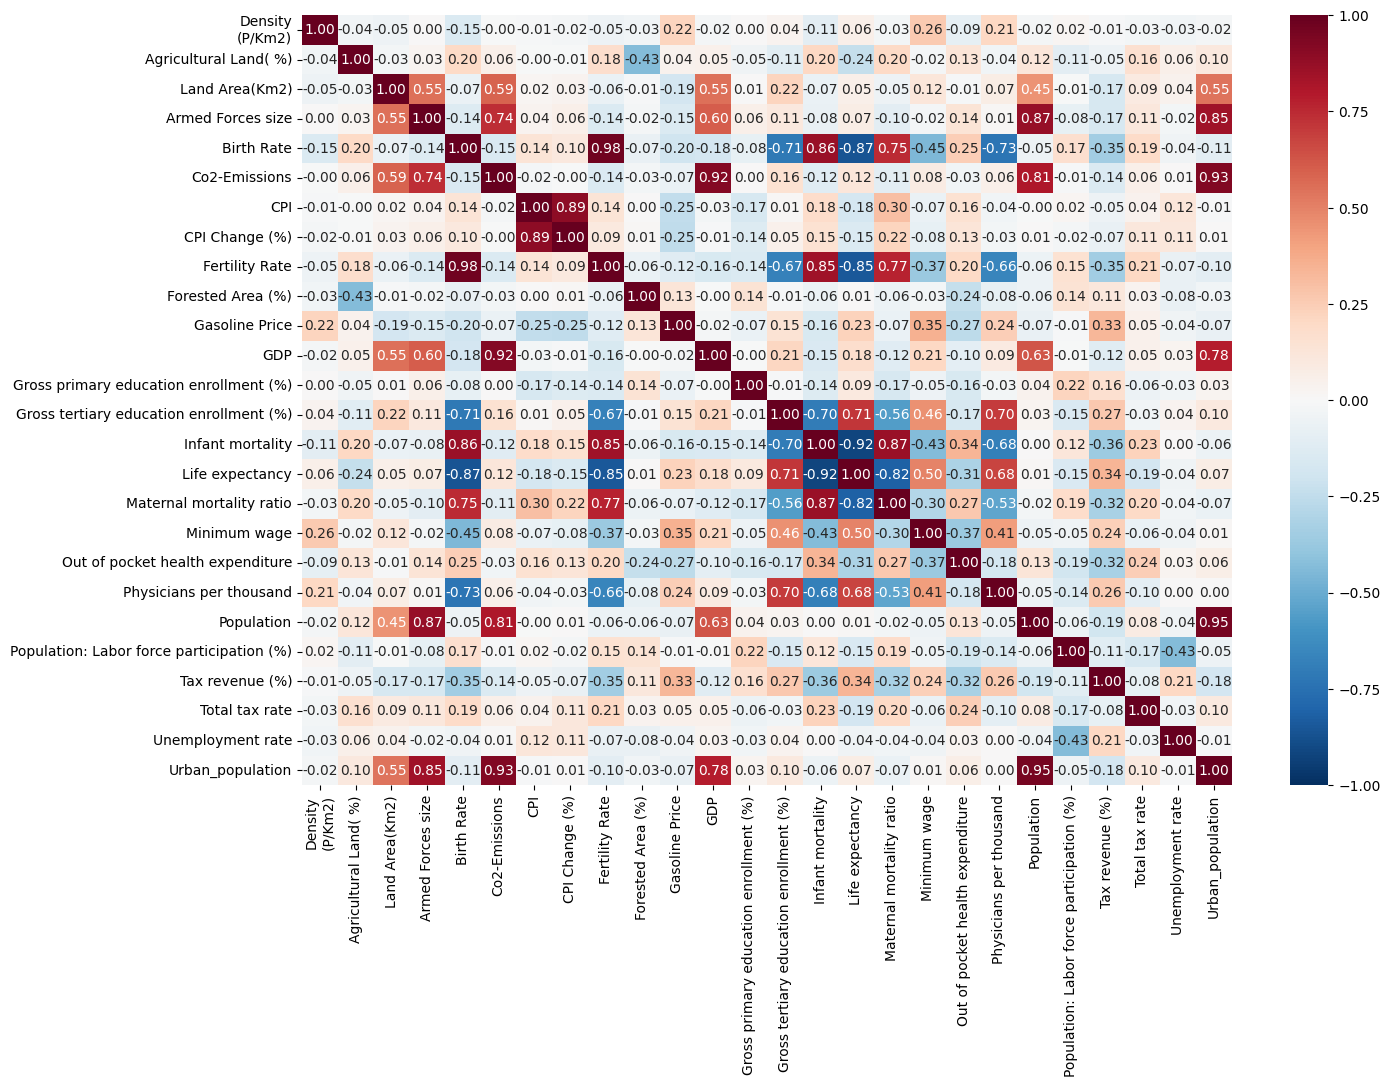

In [ ]:
# Correlation Matrix _ Ma trận tương quan
CorrelationMatrix = DataSet[NumericalVariables].corr()

plt.figure(figsize=(15,10))

mask = np.triu(np.ones_like(CorrelationMatrix, dtype=bool))

sns.heatmap(CorrelationMatrix,
            cmap='RdBu_r',
            annot=True,
            fmt='.2f',
            vmin=-1, vmax=1)

plt.show()

In [ ]:
# Chuyển đổi tên cột thành chữ thường
data.columns = [column.lower() for column in data.columns]

# Chuyển đổi các mục thành chữ thường và loại bỏ khoảng trắng ở cuối
columns = data.columns
for column in columns:
    if data[column].dtype == 'object':
        data[column] = data[column].str.lower() # chuyển đổi các mục thành chữ thường
        data[column] = data[column].str.strip() # loại bỏ khoảng trắng ở cuối


**Phân tích thống kê trên dữ liệu**

Phân tích thống kê trên dữ liệu dựa trên thống kê mô tả _ Descriptive Statistics

Dùng thống kê mô tả để tính toán cho biến phụ thuộc Life Expectancy _ Tuổi thọ => Nâng cao hiểu biết về dữ liệu trước khi trực quan hóa và phân tích.

Các số liệu được tính toán gồm: 3 Số đo độ tập trung (Measures of central tendency) và 3 Số đo độ phân tán (Measure of dispersion):

3 Số đo độ tập trung (Measures of central tendency)
1.  Mean _ Giá trị trung bình

    *Tuổi thọ trung bình.*

2.  Median _ Giá trị giữa

    *Tuổi thọ trung bình khi dữ liệu được sắp xếp.*

3.  Mode _ Giá trị xuất hiện thường xuyên nhất trong tập hợp
    
    *Tuổi thọ xuất hiện thường xuyên nhất trong dữ liệu.*


3 Số đo độ phân tán (Measure of dispersion)
1.  Standard deviation _ Độ lệch chuẩn

    *Độ lệch so với tuổi thọ trung bình.*

2.  Range _ Khoảng biến thiên
    
    *Sự khác biệt giữa tuổi thọ cao nhất và tuổi thọ thấp nhất.*

3.  Interquartile range _ Khoảng trải giữa
    
    *Khoảng cách giữa tứ phân vị thứ nhất và tứ phân vị thứ ba.*


In [ ]:
# Số đo độ tập trung (Measures of central tendency)
print('\nCentral tendency:')

life_expectancy_mean = data['life expectancy'].mean() # mean
print('Life expectancy mean:', life_expectancy_mean)

life_expectancy_median = data['life expectancy'].median() # median
print('Life expectancy median:', life_expectancy_median)

life_expectancy_mode = data['life expectancy'].mode()[0] # mode
print('Life expectancy mode:', life_expectancy_mode)

# Số đo độ phân tán (Measure of dispersion)
print('\nDispersion:')
life_expectancy_sd = data['life expectancy'].std() # standard deviation
print('Life expectancy standard deviation:', life_expectancy_sd)

life_expectancy_max = data['life expectancy'].max()
life_expectancy_min = data['life expectancy'].min()
life_expectancy_range = life_expectancy_max - life_expectancy_min # range
print('Life expectancy range:', life_expectancy_range)

q3 = data['life expectancy'].quantile(0.75)
q1 = data['life expectancy'].quantile(0.25)
life_expectancy_iqr = q3 - q1 # interquartile range
print('Interquartile range:', life_expectancy_iqr)

# Sử dụng .describe() tạo số liệu thống kê tóm tắt.
print('\nSummary:\n', data['life expectancy'].describe())

Tóm lại:

- Tuổi thọ trung bình là khoảng 72 (mean).
- Trung bình, tuổi thọ lệch khỏi mức trung bình này khoảng 7,5 năm (std_standard deviation).
- Giữa tuổi thọ cao nhất và thấp nhất, có sự chênh lệch khoảng 32,6 năm (range).
- 50% tuổi thọ trung bình kéo dài trong khoảng 10,5 năm (interquartile range).

Bản tóm tắt hiển thị:
- Tuổi thọ tối đa, cao nhất: khoảng 85
- Tuổi thọ tối thiểu, thấp nhất: khoảng 53.

In [ ]:
# Xác định hai quốc gia lần lượt có tuổi thọ cao nhất và thấp nhất.
# Quốc gia có tuổi thọ cao nhất
max_country = data.loc[data['life expectancy'].idxmax(), 'country']
print('Country with highest life expectancy:', max_country, 'at', life_expectancy_max)

# Quốc gia có tuổi thọ thấp nhất
min_country = data.loc[data['life expectancy'].idxmin(), 'country']
print('Country with lowest life expectancy:', min_country, 'at', life_expectancy_min)

Country with highest life expectancy: san marino at 85.4
Country with lowest life expectancy: central african republic at 52.8


**Data Visualisation _ Trực quan hóa dữ liệu**

*(Vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu)*

Sử dụng biểu đồ KDE (Kernel Density Estimator) để trực quan hóa sự phân bố của độ tập trung (central tendency) và độ phân tán (dispersion) của một biến liên tục.

Ví dụ: Các đỉnh tương ứng với các mode. Ngược lại, biểu đồ scatter có đường phù hợp nhất sẽ hiển thị mối quan hệ giữa một biến độc lập và một biến phụ thuộc.

- Dùng biểu đồ KDE để trực quan hóa biến phụ thuộc là tuổi thọ _ Life Expectancy.

- Sau đó, tạo một biểu đồ scatter riêng biệt với đường phù hợp nhất cho từng biến độc lập để trực quan hóa mối quan hệ của chúng với biến phụ thuộc.

In [ ]:
# Biểu đồ KDE (Kernel density estimate)
sns.kdeplot(data=data['life expectancy'], fill=True)
plt.show()

# Các biến phụ thuộc
columns = ['agricultural land( %)',
           'birth rate',
           'fertility rate',
           'infant mortality',
           'maternal mortality ratio',
           'forested area (%)',
           'gross primary education enrollment (%)',
           'gross tertiary education enrollment (%)',
           'physicians per thousand',
           'tax revenue (%)',
           'unemployment rate',
           'co2-emissions',
           'population',
           'population: labor force participation (%)',
           'urban_population']

# Biểu đồ Scatter với các đường phù hợp nhất
for column in columns:
    sns.regplot(x=data[column], y=data['life expectancy'])
    plt.show()

=> Cả birth rate, fertility rate, infant mortality và maternal mortality ratio dường như có mối tương quan nghịch với life expectancy. Nói cách khác, việc tăng birth rate, fertility rate, infant mortality và maternal mortality ratio có liên quan đến việc giảm life expectancy.

=> Ngược lại, cả gross primary education enrollment, gross tertiary education enrollment, physicians per thousand, tax revenue và co2-emissions dường như có mối tương quan thuận với life expectancy. Nói cách khác, sự gia tăng gross primary education enrollment, gross tertiary education enrollment, physicians per thousand, tax revenue và co2-emissions có liên quan đến sự gia tăng life expectancy.

In [ ]:
# Tương quan nghịch
# Birth rate
print('Birth Rate: Number of births per 1,000 population per year\n',
      data['birth rate'].describe())
sns.kdeplot(data=data['birth rate'], fill=True)
plt.show()

# Fertility rate
print('\nFertility Rate: Average number of children born to a woman during her lifetime\n',
      data['fertility rate'].describe())
sns.kdeplot(data=data['fertility rate'], fill=True)
plt.show()

# Infant mortalit
print('Infant Mortalit: Number of deaths per 1,000 live births before reaching one year of age\n',
      data['infant mortality'].describe())
sns.kdeplot(data=data['infant mortality'], fill=True)
plt.show()

# Maternal mortality ratio
print('\nMaternal Mortality Ratio: Number of maternal deaths per 100,000 live births\n',
      data['maternal mortality ratio'].describe())
sns.kdeplot(data=data['maternal mortality ratio'], fill=True)
plt.show()

In [ ]:
# Tương quan thuận
# Gross primary education enrollment
print('\nGross Primaryr Education Enrollment (%): Gross enrollment ratio for tertiary education\n',
      data['gross primary education enrollment (%)'].describe())
sns.kdeplot(data=data['gross primary education enrollment (%)'], fill=True)
plt.show()

# Gross tertiary education enrollment
print('\nGross Tertiary Education Enrollment (%): Gross enrollment ratio for tertiary education\n',
      data['gross tertiary education enrollment (%)'].describe())
sns.kdeplot(data=data['gross tertiary education enrollment (%)'], fill=True)
plt.show()

# Physicians per thousand
print('\nPhysicians per Thousand: Number of physicians per thousand people\n',
      data['physicians per thousand'].describe())
sns.kdeplot(data=data['physicians per thousand'], fill=True)
plt.show()

# Tax revenue
print('\nTax revenue (%): Tax revenue as a percentage of GDP\n',
      data['tax revenue (%)'].describe())
sns.kdeplot(data=data['tax revenue (%)'], fill=True)
plt.show()

# Co2-emissions
print('\nCo2-emissions: Carbon dioxide emissions in tons\n',
      data['co2-emissions'].describe())
sns.kdeplot(data=data['co2-emissions'], fill=True)
plt.show()

**Data Analysis _ Thống kê dữ liệu**

Hệ số tương quan (correlation coefficient) có thể định lượng cường độ và hướng của mối tương quan rõ ràng giữa hai biến.

Hệ số xác định (coefficient of determination) cho chúng ta biết mức độ biến thiên của biến phụ thuộc có thể được giải thích bởi biến độc lập.

Nói cách khác, hệ số tương quan định lượng cường độ và hướng của mối quan hệ, trong khi hệ số xác định định lượng tỷ lệ biến đổi trong dữ liệu được giải thích bằng mô hình.

Đặt life expectancy làm biến phụ thuộc (DV) và birth rate làm biến độc lập (IV) => Tính hệ số tương quan và sau đó thực hiện hồi quy tuyến tính để thu được hệ số xác định, hệ số chặn và hệ số góc/ độ dốc (intercept and slope).
1.  Spearman's Rank Correlation Coefficient (ρ)

    *Giá trị từ -1 đến 1 định lượng cường độ và hướng của mối tương quan.*
2.  Coefficient of Determination (𝑅²)

    *Giá trị từ 0 đến 1 định lượng mức độ biến thiên của y có thể được giải thích bằng sự phụ thuộc của nó vào x.*
3.  Intercept (𝑏₀)

    *Giá trị y được dự đoán khi x bằng 0.*
4.  Slope (𝑏₁)

    *Sự gia tăng dự đoán của y khi x tăng thêm một.*

In [ ]:
# Linear regression
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression

# IV: birth rate
# DV: life expectancy

# Xóa các quốc gia thiếu giá trị cho DV
data.dropna(subset=['life expectancy'], inplace=True)

# Xóa các quốc gia có giá trị bị thiếu cho IV
clean_data = data.dropna(subset=['birth rate'])

# Gán biến
x = clean_data['birth rate'].values.reshape((-1,1))
y = clean_data['life expectancy']

# Hệ số tương quan _ Correlation coefficient
correlation_coefficient, p_value = spearmanr(x,y)
print("Spearman's rank correlation coefficient:", correlation_coefficient)
print('P-value:', p_value)

# Linear regression
model = LinearRegression().fit(x,y)
r_sq = model.score(x,y)
print('\nCoefficient of determination:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Hệ số tương quan xấp xỉ -0,86 cho thấy mối tương quan nghịch mạnh mẽ => tuổi thọ có xu hướng giảm khi tỷ lệ sinh tăng.

P-value < 0,05:
- Giả thuyết không (null hypothesis) là không có mối tương quan giữa hai biến số.
- Giả thuyết thay thế (alternative hypothesis) là có khả năng có mối tương quan thực sự giữa hai biến số - có nhiều khả năng là mối tương quan quan sát được có ý nghĩa thống kê và không xảy ra ngẫu nhiên.

=> P-value < 0,05 cho thấy rằng có đủ bằng chứng để bác bỏ giả thuyết không và ủng hộ giả thuyết thay thế.

Hệ số xác định xấp xỉ 0,77 cho thấy rằng khoảng 77% sự thay đổi về tuổi thọ được giải thích bằng mô hình hồi quy này.

Điểm chặn (Intercept) xấp xỉ 85 có nghĩa là mô hình này dự đoán tuổi thọ khoảng 85 khi tỷ lệ sinh bằng 0 (khi không có ca sinh nào). Điều này có thể tính toán được nhưng có thể không thể hiện được một trong thực tế.

Độ dốc (Slope) xấp xỉ -0,66 cho thấy tuổi thọ giảm khoảng 0,66 năm khi tỷ lệ sinh tăng thêm 1.

In [ ]:
# Sử dụng vòng lặp for để lặp lại quy trình này cho các biến còn lại
IVs = ['fertility rate', 'infant mortality', 'maternal mortality ratio', 'gross primary education enrollment (%)',
       'gross tertiary education enrollment (%)', 'physicians per thousand', 'tax revenue (%)', 'co2-emissions']
for IV in IVs:
    clean_data = data.dropna(subset=[IV]) # Xóa các quốc gia thiếu giá trị cho IV
    x = clean_data[IV].values.reshape((-1,1))
    y = clean_data['life expectancy']
    correlation_coefficient, p_value = spearmanr(x,y) # correlation coefficient
    model = LinearRegression().fit(x,y) # linear regression
    r_sq = model.score(x,y)
    print('\n', [IV])
    print("Spearman's rank correlation coefficient:", correlation_coefficient)
    print('P-value:', p_value)
    print('Coefficient of determination:', r_sq)
    print('Intercept:', model.intercept_)
    print('Slope:', model.coef_)

Những kết quả này cho thấy infant mortality (tỷ lệ tử vong ở trẻ sơ sinh) có mối tương quan chặt chẽ nhất với tuổi thọ, vì nó mang lại hệ số tương quan cực đoan nhất (xấp xỉ 0.93). Hơn nữa, infant mortality mang lại hệ số xác định cao nhất (xấp xỉ 0.86) và mô hình hồi quy tương ứng của nó do đó giải thích tỷ lệ biến động cao nhất về tuổi thọ.

In [ ]:
# Sử dụng thư viện statsmodels để tạo bản tóm tắt chi tiết về mô hình hồi quy này
import statsmodels.api as sm
x = data['infant mortality'].dropna() # independent variable
y = data['life expectancy'].dropna() # dependent variable
x = sm.add_constant(x) # constant
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

**Tóm lại**

- Tuổi thọ trung bình toàn cầu là khoảng 72 tuổi.
- Tuổi thọ trung bình thường chênh lệch so với mức trung bình này khoảng 7,5 năm, nhưng có phạm vi xấp xỉ 33 năm.
- Tuổi thọ cao nhất là khoảng 85 tuổi ở San Marino và tuổi thọ thấp nhất là khoảng 53 tuổi ở Cộng hòa Trung Phi.

- Infant mortality, Maternal mortality ratio, Birth rate và Fertility rate có tương quan nghịch với tuổi thọ, với hệ số tương quan lần lượt xấp xỉ -0.93, -0.88, -0,86 và -0,84. Vì vậy, Infant mortality, Maternal mortality ratio, Birth rate và Fertility rate có liên quan đến tuổi thọ thấp.
- Ngược lại, Physicians per thousand và Gross tertiary education enrollment có mối tương quan thuận với tuổi thọ, với hệ số tương quan lần lượt là khoảng 0,81 và 0,78. Do đó, giá trị cao đối với Physicians per thousand và Gross tertiary education enrollment có liên quan đến tuổi thọ cao.
- Xây dựng mô hình hồi quy cho từng biến trong số bốn biến độc lập này liên quan đến tuổi thọ gồm: Infant mortality, Maternal mortality ratio, Birth rate, Fertility rate, Physicians per thousand và Gross tertiary education enrollment mang lại các hệ số xác định lần lượt là khoảng 0.86, 0.70, 0,77, 0,72, 0,50 và 0,52. Trong bối cảnh của mô hình hồi quy, các giá trị này chỉ ra rằng:

```
 Infant mortality giải thích khoảng 86% sự thay đổi trong tuổi thọ.
 Maternal mortality ratio giải thích khoảng 70% sự thay đổi trong tuổi thọ.
 Birth rate giải thích khoảng 77% sự thay đổi trong tuổi thọ.
 Fertility rate giải thích khoảng 72% sự thay đổi trong tuổi thọ.
 Physicians per thousand giải thích khoảng 50% sự thay đổi trong tuổi thọ.
 Gross tertiary education enrollment giải thích khoảng 52% sự thay đổi về tuổi thọ.
```
- Với độ dốc (slope) cho từng mô hình hồi quy:


```
 Infant mortality tăng 1 tương ứng với tuổi thọ giảm khoảng 0,35 năm.
 Maternal mortality ratio tăng 1 tương ứng với tuổi thọ giảm khoảng 0,027 năm.
 Birth rate tăng 1 tương ứng với tuổi thọ giảm khoảng 0,7 năm.
 Fertility rate tăng 1 tương ứng với tuổi thọ trung bình giảm khoảng 5,0 năm
 Physicians per thousand tăng tương ứng với mức tuổi thọ trung bình tăng khoảng 3,1 năm
 Gross tertiary education enrollment tăng thêm 1 năm tương ứng với mức tăng tuổi thọ khoảng 0,2 năm.
```
- Điều quan trọng là cả hệ số tương quan lẫn hệ số xác định đều không thiết lập được mối quan hệ nhân quả. Vì chỉ có thể báo cáo mối tương quan – mối liên hệ – giữa các biến số. Như là, tuổi thọ thấp có liên quan đến tỷ lệ sinh cao, nhưng tỷ lệ sinh cao không gây ra tuổi thọ thấp.

**2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing.**

Các mô hình học máy cơ bản mà bạn có thể sử dụng để giải quyết các bài toán liên quan đến dữ liệu này bao gồm:
*   Linear Regression (Hồi quy tuyến tính): Mô hình dự đoán giá trị đầu ra dựa trên một hoặc nhiều đặc trưng đầu vào liên tục.

* Logistic Regression (Hồi quy Logistic): Mô hình phân loại nhị phân hoặc đa lớp dựa trên đặc trưng đầu vào và áp dụng hàm sigmoid để ước lượng xác suất.

*  Decision Trees (Cây quyết định): Mô hình dự đoán giá trị đầu ra bằng cách chia dữ liệu thành các nhánh dựa trên các quy tắc quyết định.
Random Forests: Mô hình kết hợp nhiều cây quyết định để tạo ra dự đoán chính xác và ổn định hơn.

*   Gradient Boosting Models (GBM): Mô hình kết hợp nhiều cây quyết định thông qua việc tối ưu hóa hàm mất mát gradient để dự đoán giá trị đầu ra.

*   Support Vector Machines (SVM): Mô hình xây dựng siêu mặt phẳng để phân loại hoặc hồi quy dựa trên việc tìm ra ranh giới tốt nhất giữa các lớp dữ liệu.

*   K-Nearest Neighbors (KNN): Mô hình dự đoán giá trị đầu ra dựa trên các điểm dữ liệu gần nhất trong không gian đặc trưng.





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



*   Huấn luyện mô hình:




In [ ]:
# Chọn features(biến độc lập)
independent_vars = ['density\n(p/km2)', 'agricultural land( %)', 'land area(km2)', 'armed forces size',
                     'birth rate', 'co2-emissions', 'cpi', 'cpi change (%)', 'fertility rate',
                     'forested area (%)', 'gasoline price', 'gdp', 'gross primary education enrollment (%)',
                     'gross tertiary education enrollment (%)', 'infant mortality', 'maternal mortality ratio',
                     'minimum wage', 'out of pocket health expenditure', 'physicians per thousand', 'population',
                     'population: labor force participation (%)', 'tax revenue (%)', 'total tax rate',
                     'unemployment rate', 'urban_population']
# Chọn target (biến phụ thuộc)
dependent_var = 'life expectancy'

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

Mean Squared Error: 10.836054435604394
R-squared: 0.8093689869222805


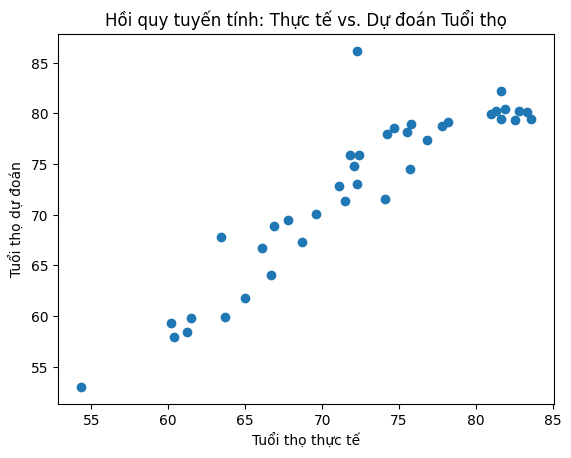

In [ ]:
# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Đào tạo mô hình trên tập huấn luyện
model.fit(train_data[independent_vars], train_data[dependent_var])

# Dự đoán trên tập kiểm tra
predictions = model.predict(test_data[independent_vars])

# Đánh giá mô hình
mse = mean_squared_error(test_data[dependent_var], predictions)
r2 = r2_score(test_data[dependent_var], predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Trực quan hóa dự đoán so với giá trị thực tế
plt.scatter(test_data[dependent_var], predictions)
plt.xlabel('Tuổi thọ thực tế')
plt.ylabel('Tuổi thọ dự đoán')
plt.title('Hồi quy tuyến tính: Thực tế vs. Dự đoán Tuổi thọ')
plt.show()


Ngoài ra, các mô hình Ensemble Learning cũng có thể được áp dụng. Ensemble Learning kết hợp nhiều mô hình dự đoán nhỏ để tạo ra một dự đoán tổng thể mạnh hơn. Một số mô hình Ensemble Learning phổ biến như sau:


*   Bagging (Đóng bao): Sử dụng bootstrap để tạo ra nhiều bộ dữ liệu con khác nhau và huấn luyện các mô hình độc lập trên từng bộ dữ liệu con. Xây dựng một lượng lớn các models (thường là cùng loại) trên những subsamples khác nhau từ tập training dataset một cách song song nhằm đưa ra dự đoán tốt hơn

*   Boosting (Tăng cường): Xây dựng các mô hình tuần tự, mỗi mô hình tập trung vào việc cải thiện các trường hợp dự đoán sai của mô hình trước đó.
*   Random Forests (Xếp chồng): Kết hợp các cây quyết định độc lập sử dụng kỹ thuật Bagging để tạo ra dự đoán chính xác và ổn định hơn.






In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
independent_vars = ['density\n(p/km2)', 'agricultural land( %)', 'land area(km2)', 'armed forces size',
                     'birth rate', 'co2-emissions', 'cpi', 'cpi change (%)', 'fertility rate',
                     'forested area (%)', 'gasoline price', 'gdp', 'gross primary education enrollment (%)',
                     'gross tertiary education enrollment (%)', 'infant mortality', 'maternal mortality ratio',
                     'minimum wage', 'out of pocket health expenditure', 'physicians per thousand', 'population',
                     'population: labor force participation (%)', 'tax revenue (%)', 'total tax rate',
                     'unemployment rate', 'urban_population']

# Chọn biến phụ thuộc (target)
dependent_var = 'life expectancy'
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Tạo mô hình hồi quy tuyến tính cơ sở
base_model = LinearRegression()
# Tạo mô hình BaggingRegressor
bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)


Mean Squared Error: 7.70963004973865
R-squared: 0.8643699516673632


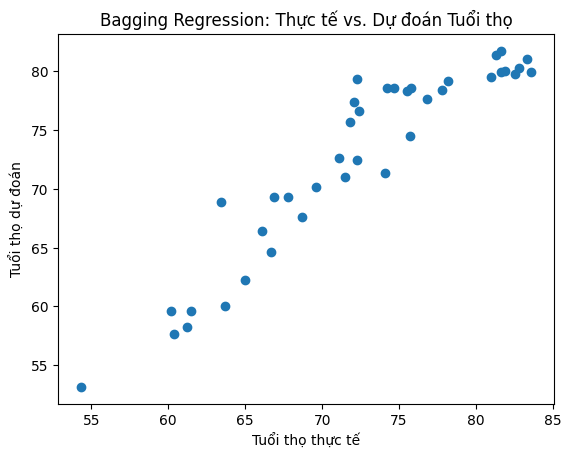

In [ ]:
# Đào tạo mô hình trên tập huấn luyện
bagging_model.fit(train_data[independent_vars], train_data[dependent_var])

# Dự đoán trên tập kiểm tra
predictions = bagging_model.predict(test_data[independent_vars])

# Đánh giá mô hình
mse = mean_squared_error(test_data[dependent_var], predictions)
r2 = r2_score(test_data[dependent_var], predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Trực quan hóa dự đoán so với giá trị thực tế
plt.scatter(test_data[dependent_var], predictions)
plt.xlabel('Tuổi thọ thực tế')
plt.ylabel('Tuổi thọ dự đoán')
plt.title('Bagging Regression: Thực tế vs. Dự đoán Tuổi thọ')
plt.show()

**3)	Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán.**

In [ ]:
data1 = data
data1['life expectancy'] = data1['life expectancy'].astype(float)
data1['life expectancy'].head()
data1['life expectancy'] = data1['life expectancy'] > 70
data1['life expectancy'] = data1['life expectancy'].astype(str)
data1['life expectancy'] = data1['life expectancy'].str.replace('T', '1')
data1['life expectancy'] = data1['life expectancy'].str.replace('F', '0')

a = 'ruealse'
for i in a:
  data1['life expectancy'] = data1['life expectancy'].str.replace(i, '')

data1['life expectancy'] = data1['life expectancy'].astype(int)
data1['life expectancy'].head(20)


0     0
1     1
2     1
3     1
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
Name: life expectancy, dtype: int64

In [ ]:
import math
import random

n_test = int(math.ceil(len(data) * 0.3))
random.seed(42)
test_ixs = random.sample(list(range(len(data))), n_test)
train_ixs = [ix for ix in range(len(data)) if ix not in test_ixs]
train = data.iloc[train_ixs, :]
test = data.iloc[test_ixs, :]
print(len(train))
print(len(test))

136
59


In [ ]:
#features = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
#           'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)',
#           'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure', 'Physicians per thousand',
#           'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']
features = ['birth rate', 'physicians per thousand']
response = 'life expectancy'
x_train = train[features]
y_train = train[response]
x_test = test[features]
y_test = test[response]

In [ ]:
from sklearn import model_selection, preprocessing
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

**Tạo mô hình Neural Network cơ sở**

Tạo một Neural Network đơn giản để thử và đạt được kết quả tốt nhất bằng logistic regression và decision trees.

Sử dụng một lớp ẩn duy nhất để tìm hiểu các feature hữu ích cho nhiệm vụ của mình và sau đó là lớp cuối cùng để thực hiện phân loại (classification)



In [ ]:
# Kiểm soát hyperparameters
hidden_units = 10     # có bao nhiêu nơ-ron trong lớp ẩn
activation = 'relu'   # chức năng kích hoạt cho lớp ẩn
l2 = 0.01             # regularization_chính quy hóa - mức độ xử lý các giá trị tham số lớn
learning_rate = 0.01  # các step lớn như nào trong gradient descent
epochs = 5            # có bao nhiêu epochs để train
batch_size = 16       # sử dụng bao nhiêu mẫu cho mỗi lần cập nhật gradient descent

Xây dựng mô hình theo các thông số kỹ thuật này

In [ ]:
from keras import models, layers, optimizers, regularizers
import warnings

# tạo 1 sequential model
model = models.Sequential()

# thêm lớp ẩn
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units,
                       activation=activation))

# thêm lớp đầu ra
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# xác định loss function và optimizer
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model.compile(loss='binary_crossentropy',
                  # Adam là một kiểu gradient descent
                  optimizer=optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])

Huấn luyện mô hình

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 0.7567 - accuracy: 0.3088
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.7459 - accuracy: 0.3088
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.3088
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.7251 - accuracy: 0.3088
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.3088
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.3088
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.3235
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5588
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6912
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6774 - accuracy: 0.6610
Training accuracy: 0.6911764740943909
T

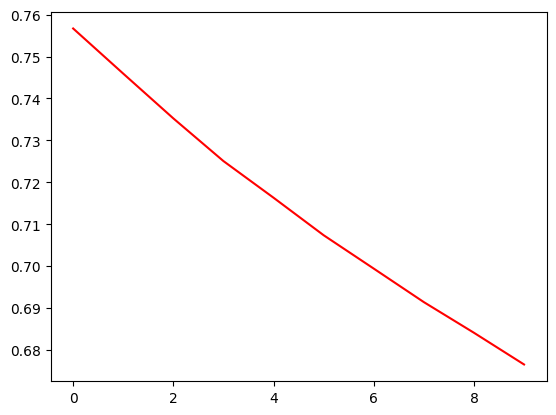

In [ ]:
# huấn luyện các thông số
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

# đánh giá độ chính xác _ accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

**Non-Determinacy**

Các tham số ban đầu của mạng sẽ được xác định ngẫu nhiên. Mỗi lần chúng ta sẽ bắt đầu trên một phần ngẫu nhiên của bề mặt mất mát (loss surface). Điều này sẽ dẫn đến một kết quả khác.

Đào tạo mạng 20 lần và lấy mức trung bình.

In [ ]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train,
                y_train,
                epochs=epochs,
                batch_size=batch_size,
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [ ]:
from tqdm import tqdm
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:07<00:00,  2.82it/s]

Avgerage Training Accuracy: 0.6911764740943909
Avgerage Testing Accuracy: 0.6610169410705566


Tuy vẫn mang lại một số variance nhưng nếu đáng tin cậy hơn nhiều. Chúng ta tính trung bình càng nhiều lần thì kết quả đó càng đáng tin cậy. Điều này chắc chắn sẽ tốt hơn nhiều so với việc lấy một lần chạy để đánh giá mức độ tốt của một mô hình.

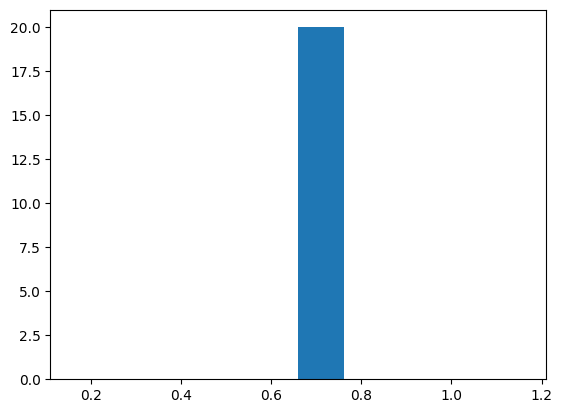

In [ ]:
plt.hist(test_accs)
plt.show()

In [ ]:
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

Min: 0.6610169410705566
Max: 0.6610169410705566


Beat the Baseline

In [ ]:
# Kiểm soát hyperparameters
hidden_units = 20     # có bao nhiêu nơ-ron trong lớp ẩn
activation = 'relu'   # chức năng kích hoạt cho lớp ẩn
l2 = 0.01             # regularization_chính quy hóa - mức độ xử lý các giá trị tham số lớn
learning_rate = 0.01  # các step lớn như nào trong gradient descent
epochs = 5            # có bao nhiêu epochs để train
batch_size = 16       # sử dụng bao nhiêu mẫu cho mỗi lần cập nhật gradient descent

In [ ]:
# tạo 1 sequential model
model = models.Sequential()

# thêm lớp ẩn
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units,
                       activation=activation))

# thêm lớp đầu ra
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# xác định loss function và optimizer
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model.compile(loss='binary_crossentropy',
                  # Adam là một kiểu gradient descent
                  optimizer=optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])

In [ ]:
_, __ = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:13<00:00,  1.48it/s]

Avgerage Training Accuracy: 0.7011029452085495
Avgerage Testing Accuracy: 0.6694915175437928


**Reccurent Neural Network (RNN)**

In [ ]:
data2 = data
train = data2.loc[:, ['life expectancy']].values #chuyển đổi thành mảng
train

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler #chia tỷ lệ từ 0-1
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

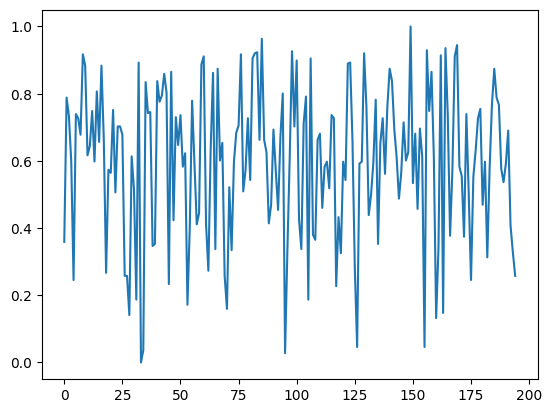

In [ ]:
plt.plot(train_scaled)

Tạo Data Structure

In [ ]:
#Lấy 1-50 điểm đầu tiên cho X_train và điểm dữ liệu thứ 51 cho y_train,
#Tạo khung dữ liệu bằng cách lấy 2-51 cho X_train, 52 cho y_train
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 190):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

Reshape

In [ ]:
#Reshaping:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Tạo mô hình RNN


In [ ]:
# import thư viện
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Khởi tạo RNN:
regressor = Sequential()

#Thêm lớp RNN đầu tiên và một vài Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Thêm lớp RNN thứ hai và một vài Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Thêm lớp RNN thứ ba và một vài Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Thêm lớp RNN thứ tư và một vài Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Thêm lớp đầu ra
regressor.add(Dense(units = 1))

#Biên dịch RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fit RNN vào Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
5/5 [==============================] - 5s 44ms/step - loss: 0.7016
Epoch 2/100
5/5 [==============================] - 0s 46ms/step - loss: 0.4488
Epoch 3/100
5/5 [==============================] - 0s 44ms/step - loss: 0.4830
Epoch 4/100
5/5 [==============================] - 0s 41ms/step - loss: 0.3544
Epoch 5/100
5/5 [==============================] - 0s 41ms/step - loss: 0.4216
Epoch 6/100
5/5 [==============================] - 0s 43ms/step - loss: 0.3968
Epoch 7/100
5/5 [==============================] - 0s 45ms/step - loss: 0.3714
Epoch 8/100
5/5 [==============================] - 0s 42ms/step - loss: 0.3168
Epoch 9/100
5/5 [==============================] - 0s 41ms/step - loss: 0.3160
Epoch 10/100
5/5 [==============================] - 0s 42ms/step - loss: 0.3161
Epoch 11/100
5/5 [==============================] - 0s 50ms/step - loss: 0.2729
Epoch 12/100
5/5 [==============================] - 0s 73ms/step - loss: 0.2887
Epoch 13/100
5/5 [==============================]

- Epochs có thể được tăng lên
- Batch size có thể được thay đổi
- Activation functions có thể được thay đổi
- Số lớp có thể tăng lên

**Dự đoán và trực quan hóa mô hình RNN**

In [ ]:
data3 = data
real_life_expectancy = data3.loc[:, ['life expectancy']].values
real_life_expectancy

In [ ]:
#Lấy tuổi thọ trung bình dự đoán
dataset_total = pd.concat((data3['life expectancy'], data3['life expectancy']), axis=0)
inputs = dataset_total[len(dataset_total)-len(data3) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler
inputs

In [ ]:
X_test = []
for i in range(timesteps, 190):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_life_expectancy = regressor.predict(X_test)
predicted_life_expectancy = scaler.inverse_transform(predicted_life_expectancy)
#Với inverse_transform, đưa các giá trị được dự đoán về phạm vi giá trị thực tế sau khi chia tỷ lệ.

5/5 [==============================] - 0s 22ms/step


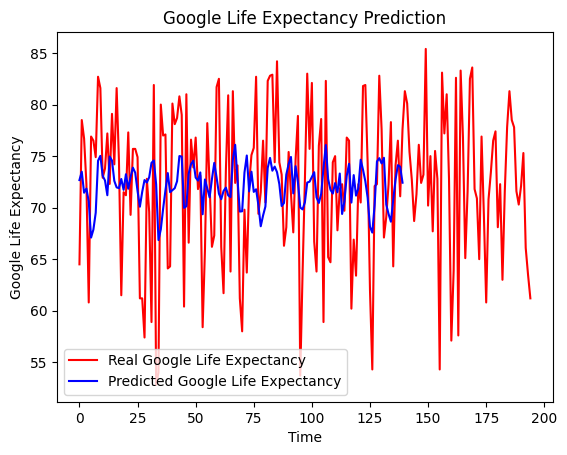

In [ ]:
plt.plot(real_life_expectancy, color='red', label='Real Google Life Expectancy')
plt.plot(predicted_life_expectancy, color='blue', label='Predicted Google Life Expectancy')
plt.title('Google Life Expectancy Prediction')
plt.xlabel('Time')
plt.ylabel('Google Life Expectancy')
plt.legend()
plt.show()

**2) Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing**

Các mô hình học máy cơ bản mà bạn có thể sử dụng để giải quyết các bài toán liên quan đến dữ liệu này bao gồm:
*   Linear Regression (Hồi quy tuyến tính): Mô hình dự đoán giá trị đầu ra dựa trên một hoặc nhiều đặc trưng đầu vào liên tục.

* Logistic Regression (Hồi quy Logistic): Mô hình phân loại nhị phân hoặc đa lớp dựa trên đặc trưng đầu vào và áp dụng hàm sigmoid để ước lượng xác suất.

*  Decision Trees (Cây quyết định): Mô hình dự đoán giá trị đầu ra bằng cách chia dữ liệu thành các nhánh dựa trên các quy tắc quyết định.
Random Forests: Mô hình kết hợp nhiều cây quyết định để tạo ra dự đoán chính xác và ổn định hơn.

*   Gradient Boosting Models (GBM): Mô hình kết hợp nhiều cây quyết định thông qua việc tối ưu hóa hàm mất mát gradient để dự đoán giá trị đầu ra.

*   Support Vector Machines (SVM): Mô hình xây dựng siêu mặt phẳng để phân loại hoặc hồi quy dựa trên việc tìm ra ranh giới tốt nhất giữa các lớp dữ liệu.

*   K-Nearest Neighbors (KNN): Mô hình dự đoán giá trị đầu ra dựa trên các điểm dữ liệu gần nhất trong không gian đặc trưng.





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('/world-data-2023.csv')


In [ ]:
# Xác định biến phụ thuộc và độc lập
dependent_variable = 'GDP'
independent_variables = ['Density (P/Km2)', 'Birth Rate', 'CO2 Emissions', 'Population']


In [ ]:
# Chuẩn bị dữ liệu cho mô hình
independent_variables = ["Density (P/Km2)", "CO2 Emissions"]
dependent_variable = "Population"
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X_train, y_train = train_data[independent_variables].get_dummies(), train_data[dependent_variable]
X_test, y_test = test_data[independent_variables].get_dummies(), test_data[dependent_variable]


In [ ]:
# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Vẽ đồ thị thực tế vs. dự đoán
plt.scatter(y_test, y_pred)
plt.xlabel('Thực tế:')
plt.ylabel('Dự đoán')
plt.title('Thực tế vs Dự đoán')
plt.show()

# In ra các hệ số hồi quy
print('Hệ số hồi quy:')
for feature, coefficient in zip(independent_variables, model.coef_):
    print(f'{feature}: {coefficient}')

# Đưa ra dự đoán cho một quốc gia mới (ví dụ)
new_country_data = pd.DataFrame([[100, 12, 50000, 8000000]], columns=independent_variables)
new_prediction = model.predict(new_country_data)
print(f'Dự đoán GDP cho quốc gia mới: {new_prediction[0]}')

NameError: ignored

Ngoài ra, các mô hình Ensemble Learning cũng có thể được áp dụng. Ensemble Learning kết hợp nhiều mô hình dự đoán nhỏ để tạo ra một dự đoán tổng thể mạnh hơn. Một số mô hình Ensemble Learning phổ biến như sau:


*   Bagging (Đóng bao): Sử dụng bootstrap để tạo ra nhiều bộ dữ liệu con khác nhau và huấn luyện các mô hình độc lập trên từng bộ dữ liệu con. Xây dựng một lượng lớn các models (thường là cùng loại) trên những subsamples khác nhau từ tập training dataset một cách song song nhằm đưa ra dự đoán tốt hơn

*   Boosting (Tăng cường): Xây dựng các mô hình tuần tự, mỗi mô hình tập trung vào việc cải thiện các trường hợp dự đoán sai của mô hình trước đó.
*   Random Forests (Xếp chồng): Kết hợp các cây quyết định độc lập sử dụng kỹ thuật Bagging để tạo ra dự đoán chính xác và ổn định hơn.






**4)	Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán.**

Overfitting là hiện tượng mô hình máy học được huấn luyện quá mức trên dữ liệu huấn luyện, đến mức nó "nhớ" cả các chi tiết và nhiễu không cần thiết trong dữ liệu đó, dẫn đến hiệu suất kém trên dữ liệu mới. Để tránh overfitting, có một số kỹ thuật quan trọng mà bạn có thể áp dụng:

1. **Chia tách dữ liệu:** Phân chia dữ liệu thành tập huấn luyện, tập kiểm thử và tập validation. Tập huấn luyện được sử dụng để huấn luyện mô hình, tập validation giúp điều chỉnh siêu tham số và kiểm thử để đánh giá hiệu suất trên dữ liệu mới.

2. **Regularization:** Thêm các thành phần như L1 hoặc L2 regularization vào hàm mất mát giúp kiểm soát sức mạnh của các trọng số trong mô hình. Điều này giúp tránh việc mô hình quá phức tạp.

3. **Dropout:** Sử dụng kỹ thuật dropout trong quá trình huấn luyện. Dropout tạm thời "tắt" một số đơn vị trong quá trình lan truyền ngược, giúp tránh việc mô hình phụ thuộc quá nhiều vào một số đặc trưng cụ thể.

4. **Early stopping:** Theo dõi hiệu suất trên tập validation và dừng quá trình huấn luyện khi hiệu suất trên tập validation không còn cải thiện nữa.

5. **Dữ liệu mở rộng:** Tăng cường dữ liệu bằng cách áp dụng các biến đổi nhỏ như xoay, phóng to, cắt ghép, để tạo ra thêm mẫu dữ liệu và giảm khả năng mô hình nhớ chính xác các mẫu.

6. **Kiểm soát độ phức tạp của mô hình:** Sử dụng các mô hình đơn giản hơn khi có thể, tránh sử dụng quá nhiều lớp và nơ-ron khi không cần thiết.

7. **Cross-validation:** Sử dụng kỹ thuật cross-validation để đánh giá hiệu suất của mô hình trên nhiều tập dữ liệu khác nhau.

8. **Giảm chiều dữ liệu:** Sử dụng kỹ thuật giảm chiều dữ liệu như PCA để giảm số lượng đặc trưng và giảm nguy cơ overfitting.

Kết hợp các kỹ thuật trên có thể giúp cải thiện khả năng tổng quát hóa của mô hình và tránh overfitting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/world-data-2023.csv')
# Kiểu dữ liệu của mỗi cột
print('Data Types:\n', data.dtypes, '\n')

# Số giá trị duy nhất trong mỗi cột
print('Unique Values:')
for column in data.columns:
    print(f'{column}:', len(data[column].unique()))

# Thiếu giá trị trong từng cột
missing = data.isnull().sum()
print('\nMissing Values:\n', missing)


Data Types:
 Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollme

In [ ]:
DataSet = data

NumericalVariables = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

# Thay đổi kiểu dữ liệu khi thích hợp
for variable in NumericalVariables:
    if (DataSet[variable].dtypes == 'object'):
        DataSet[variable] = DataSet[variable].str.replace(',', '')
        DataSet[variable] = DataSet[variable].str.replace('%', '')
        DataSet[variable] = DataSet[variable].str.replace('$', '')
        DataSet[variable] = DataSet[variable].astype(float)

for variable in NumericalVariables:
    DataSet[variable].fillna(DataSet[variable].mean(), inplace=True)

DataSet.sample(10)


<ipython-input-64-5e96da0d7825>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DataSet[variable] = DataSet[variable].str.replace('$', '')


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
151,Saudi Arabia,16.0,SA,80.8,2149690.0,252000.000000,17.80,966.0,Riyadh,563449.0,...,15.0,2.61,34268528.0,55.900000,8.900000,15.7,5.930000,28807838.0,23.885942,45.079162
170,Syria,95.0,SY,75.8,185180.0,239000.000000,23.69,963.0,Damascus,28830.0,...,53.7,1.22,17070135.0,44.100000,14.200000,42.7,8.370000,9358019.0,34.802075,38.996815
0,Afghanistan,60.0,AF,58.1,652230.0,323000.000000,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.900000,9.300000,71.4,11.120000,9797273.0,33.939110,67.709953
2,Algeria,18.0,DZ,17.4,2381741.0,317000.000000,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.200000,37.200000,66.1,11.700000,31510100.0,28.033886,1.659626
4,Angola,26.0,AO,47.5,1246700.0,117000.000000,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.500000,9.200000,49.1,6.890000,21061025.0,-11.202692,17.873887
111,Federated States of Micronesia,784.0,FM,31.4,702.0,159274.853801,22.82,691.0,Palikir,143.0,...,2.5,0.18,113815.0,62.738068,25.200000,60.5,6.886364,25963.0,7.425554,150.550812
44,Czech Republic,139.0,CZ,45.2,78867.0,23000.000000,10.70,420.0,Prague,102218.0,...,14.8,4.12,10669709.0,60.600000,14.900000,46.1,1.930000,7887156.0,49.817492,15.472962
123,New Zealand,18.0,NZ,40.5,268838.0,9000.000000,11.98,64.0,Wellington,34382.0,...,12.6,3.59,4841000.0,69.900000,29.000000,34.6,4.070000,4258860.0,-40.900557,174.885971
192,Yemen,56.0,YE,44.6,527968.0,40000.000000,30.45,967.0,Sanaa,10609.0,...,81.0,0.31,29161922.0,38.000000,16.573964,26.6,12.910000,10869523.0,15.552727,48.516388
171,Tajikistan,68.0,TJ,34.1,144100.0,17000.000000,30.76,992.0,Dushanbe,5310.0,...,63.1,1.70,9321018.0,42.000000,9.800000,67.3,11.020000,2545477.0,38.861034,71.276093


## **Minh họa tránh overfiting cho mô hình Linear Regression và Logistic Regression sử dụng kỹ thuật Regularization**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt


# Chọn các feature liên quan đến đề tài
selected_features = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Armed Forces size', 'Birth Rate',
                     'GDP', 'Population: Labor force participation (%)']

# Chọn mục tiêu là 'Life expectancy'
target = 'Life expectancy'

# Tạo DataFrame mới chỉ chứa các feature và target cần thiết
df = data[selected_features + [target]]

# Xử lý missing values (nếu có)
df = df.dropna()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df[target], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu sử dụng StandardScaler cho Linear Regression
scaler_linear = StandardScaler()
X_train_scaled_linear = scaler_linear.fit_transform(X_train)
X_test_scaled_linear = scaler_linear.transform(X_test)

# Linear Regression with Ridge regularization
ridge_model = Ridge(alpha=1.0)  # Có thể điều chỉnh giá trị của alpha
ridge_model.fit(X_train_scaled_linear, y_train)

# Đánh giá Linear Regression
y_pred_linear = ridge_model.predict(X_test_scaled_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')

# Chuyển 'Life expectancy' thành biến phân loại
threshold = 75  # Ngưỡng cắt
df['Life expectancy binary'] = (df['Life expectancy'] > threshold).astype(int)

# Tạo lại tập huấn luyện và tập kiểm tra cho Logistic Regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(df[selected_features], df['Life expectancy binary'], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu sử dụng StandardScaler cho Logistic Regression
scaler_logistic = StandardScaler()
X_train_scaled_logistic = scaler_logistic.fit_transform(X_train_logistic)
X_test_scaled_logistic = scaler_logistic.transform(X_test_logistic)

# Logistic Regression with Ridge regularization
logistic_ridge_model = LogisticRegression(penalty='l2', C=1.0)
logistic_ridge_model.fit(X_train_scaled_logistic, y_train_logistic)

# Đánh giá Logistic Regression
y_pred_logistic = logistic_ridge_model.predict(X_test_scaled_logistic)
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print(f'Accuracy (Logistic Regression): {accuracy_logistic}')




Mean Squared Error (Linear Regression): 25.135275562934396
Accuracy (Logistic Regression): 0.8717948717948718


## **Minh họa tránh overfitting cho Decision Trees**

 Để tránh overfitting cho Decision Trees, một số phương pháp thường được sử dụng bao gồm:

1. **Giảm độ sâu của cây (Tree Pruning):** Giảm độ sâu của cây có thể giúp giảm khả năng overfitting. Có thể sử dụng tham số `max_depth` để giới hạn độ sâu của cây.

2. **Số lượng mẫu tối thiểu cho mỗi lá (Minimum Samples Split):**Có thể sử dụng tham số `min_samples_split` để chỉ định số lượng mẫu tối thiểu mà một nút phải có trước khi có thể chia thành các nút con. Điều này giúp tránh việc mô hình học quá mức từ nhiễu trong dữ liệu.

3. **Số lượng mẫu tối thiểu cho mỗi lá (Minimum Samples Leaf):** Có thể sử dụng tham số `min_samples_leaf` để đặt số lượng mẫu tối thiểu mà mỗi lá của cây phải có. Điều này giúp tránh các lá có số lượng mẫu rất nhỏ và có thể dẫn đến overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Chọn các feature liên quan đến đề tài
selected_features = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Armed Forces size', 'Birth Rate',
                     'GDP', 'Population: Labor force participation (%)', 'Gasoline Price', 'CPI']

# Chọn mục tiêu là 'Life expectancy'
target = 'Life expectancy'

# Tạo DataFrame mới chỉ chứa các feature và target cần thiết
df = data[selected_features + [target]]

# Xử lý missing values (nếu có)
df = df.dropna()

# Chuyển 'Life expectancy' thành biến phân loại
threshold = 75  # Ngưỡng cắt
df['Life expectancy'] = (df['Life expectancy'] > threshold).astype(int)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['Life expectancy'], test_size=0.2, random_state=42)

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
tree_model.fit(X_train, y_train)

# Đánh giá Decision Tree
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy (Decision Tree): {accuracy_tree}')


Accuracy (Decision Tree): 0.7948717948717948


## **Minh họa tránh overfiting cho mô hình SVM**

Để tránh overfitting cho mô hình Support Vector Machines (SVM), có thể sử dụng một số kỹ thuật như:

*Regularization (C)*: Thông qua tham số C, bạn có thể kiểm soát độ phức tạp của mô hình SVM. Giá trị C càng lớn, mô hình càng phức tạp. Tuy nhiên, giá trị quá lớn có thể dẫn đến overfitting.

*Kernel Trick*: SVM cho phép sử dụng kernel để chuyển đổi dữ liệu vào không gian chiều cao hơn. Việc chọn kernel phù hợp có thể giúp tránh overfitting.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Chọn các feature liên quan đến đề tài
selected_features = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Armed Forces size', 'Birth Rate',
                     'GDP', 'Population: Labor force participation (%)']

# Chọn mục tiêu là 'Life expectancy
target = 'Life expectancy'

# Tạo DataFrame mới chỉ chứa các feature và target cần thiết
df = data[selected_features + [target]]

# Xử lý missing values (nếu có)
df = df.dropna()

## Chuyển 'Life expectancy' thành biến phân loại
threshold = 75  # Ngưỡng cắt
df['Life expectancy binary'] = (df['Life expectancy'] > threshold).astype(int)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['Life expectancy binary'], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu sử dụng StandardScaler cho SVM
scaler_svm = StandardScaler()
X_train_scaled_svm = scaler_svm.fit_transform(X_train)
X_test_scaled_svm = scaler_svm.transform(X_test)

# Support Vector Machines (SVM) Classifier
svm_model = SVC(C=1.0, kernel='rbf')  # Có thể điều chỉnh giá trị của C và kernel
svm_model.fit(X_train_scaled_svm, y_train)

# Đánh giá SVM
y_pred_svm = svm_model.predict(X_test_scaled_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm}')


Accuracy (SVM): 0.8717948717948718


##**Minh họa tránh overfiting cho mô hình KNN**

Một số kỹ thuật có thể sử dụng:

**1. Sự chọn lọc kích thước của k (số lân cận)**: Giá trị của k ảnh hưởng đến độ phức tạp của mô hình. Một k lớn có thể dẫn đến mô hình phức tạp hơn, trong khi k nhỏ có thể tăng khả năng overfitting. Chọn giá trị k phù hợp có thể giúp tránh overfitting.

**2. Chuẩn hóa dữ liệu**: Khi sử dụng KNN, việc chuẩn hóa dữ liệu có thể giúp cân bằng độ quan trọng của các đặc trưng và tránh overfitting.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Chọn các feature liên quan đến đề tài
selected_features = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Armed Forces size', 'Birth Rate',
                     'GDP', 'Population: Labor force participation (%)']

# Chọn mục tiêu là 'Life expectancy'
target = 'Life expectancy'

# Tạo DataFrame mới chỉ chứa các feature và target cần thiết
df = data[selected_features + [target]]

# Xử lý missing values (nếu có)
df = df.dropna()

# Chuyển 'Life expectancy' thành biến phân loại
threshold = 75  # Ngưỡng cắt
df['Life expectancy binary'] = (df['Life expectancy'] > threshold).astype(int)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['Life expectancy binary'], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu sử dụng StandardScaler cho KNN
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train)
X_test_scaled_knn = scaler_knn.transform(X_test)

# K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Có thể điều chỉnh giá trị của n_neighbors
knn_model.fit(X_train_scaled_knn, y_train)

# Đánh giá KNN
y_pred_knn = knn_model.predict(X_test_scaled_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (KNN): {accuracy_knn}')


Accuracy (KNN): 0.7435897435897436


## **Minh họa kỹ thuật tránh overfitting mô hình Bagging và Boosting**

Để tránh overfitting cho các mô hình Bagging và Boosting,ví dụ như Random Forests và Gradient Boosting Machines (GBM),  có thể sử dụng một số kỹ thuật như sau:

### Bagging (Random Forests):
1. **Chọn số lượng cây (`n_estimators`):** Giảm số lượng cây trong Random Forests có thể giảm khả năng overfitting. Thông thường, càng nhiều cây, mô hình càng phức tạp.

2. **Chọn độ sâu của cây (`max_depth`):** Giới hạn độ sâu của cây có thể ngăn chặn sự phức tạp của mỗi cây và giảm nguy cơ overfitting.

3. **Randomization:** Sử dụng tính ngẫu nhiên trong quá trình xây dựng các cây, chẳng hạn như việc chọn ngẫu nhiên một số lượng nhỏ đặc trưng để xây dựng mỗi cây.

### Boosting (Gradient Boosting Machines - GBM):
1. **Chọn số lượng cây (`n_estimators`):** Như trong Bagging, giảm số lượng cây có thể giảm khả năng overfitting.

2. **Chọn tỷ lệ học (`learning_rate`):** Giảm tỷ lệ học có thể giúp kiểm soát độ phức tạp của mô hình. Tuy nhiên, việc giảm tỷ lệ học cũng có thể yêu cầu tăng số lượng cây để duy trì hiệu suất.

3. **Chọn độ sâu của cây (`max_depth`):** Giống như trong Bagging, giới hạn độ sâu của cây có thể giảm khả năng overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Chọn các feature liên quan đến đề tài
selected_features = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Armed Forces size', 'Birth Rate',
                     'GDP', 'Population: Labor force participation (%)']

# Chọn mục tiêu là 'Life expectancy'
target = 'Life expectancy'

# Tạo DataFrame mới chỉ chứa các feature và target cần thiết
df = data[selected_features + [target]]

# Xử lý missing values (nếu có)
df = df.dropna()

# Chuyển 'Life expectancy' thành biến phân loại
threshold = 75  # Ngưỡng cắt
df['Life expectancy binary'] = (df['Life expectancy'] > threshold).astype(int)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['Life expectancy binary'], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu sử dụng StandardScaler cho Random Forests
scaler_rf = StandardScaler()
X_train_scaled_rf = scaler_rf.fit_transform(X_train)
X_test_scaled_rf = scaler_rf.transform(X_test)

# Random Forests Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Có thể điều chỉnh giá trị của n_estimators và max_depth
rf_model.fit(X_train_scaled_rf, y_train)

# Đánh giá Random Forests
y_pred_rf = rf_model.predict(X_test_scaled_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forests): {accuracy_rf}')

# Chuẩn hóa dữ liệu sử dụng StandardScaler cho Gradient Boosting
scaler_gbm = StandardScaler()
X_train_scaled_gbm = scaler_gbm.fit_transform(X_train)
X_test_scaled_gbm = scaler_gbm.transform(X_test)

# Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)  # Có thể điều chỉnh giá trị của n_estimators, learning_rate và max_depth
gbm_model.fit(X_train_scaled_gbm, y_train)

# Đánh giá Gradient Boosting
y_pred_gbm = gbm_model.predict(X_test_scaled_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f'Accuracy (Gradient Boosting): {accuracy_gbm}')


Accuracy (Random Forests): 0.8205128205128205
Accuracy (Gradient Boosting): 0.8205128205128205


###**Minh họa tránh overfitting cho Feed Forward Neural Network và Recurrent Neural Network**

Để tránh overfitting cho mô hình Feed Forward Neural Network (FNN) và Recurrent Neural Network (RNN), có thể sử dụng một số kỹ thuật chung:

### Kỹ thuật chung cho FNN và RNN:
1. **Dropout:**
   - **FNN:** Thêm lớp Dropout vào các lớp ẩn để ngẫu nhiên loại bỏ một số nút trong quá trình huấn luyện.
   - **RNN:** Sử dụng Dropout không chỉ trên các lớp ẩn mà còn trên các lớp LSTM hoặc GRU trong mạng nơ-ron hồi quy.

2. **Early Stopping:**
   - Sử dụng kỹ thuật early stopping để dừng quá trình huấn luyện khi hiệu suất trên tập validation không cải thiện.

3. **Regularization:**
   - Áp dụng L1 hoặc L2 regularization để kiểm soát trọng số.

### Kỹ thuật riêng cho FNN:
1. **Batch Normalization:**
   - Thêm lớp Batch Normalization để ổn định và tăng tốc độ huấn luyện.

### Kỹ thuật riêng cho RNN:
1. **Gradient Clipping:**
   - Giới hạn giá trị của gradient để ngăn chặn hiện tượng vanishing gradient trong RNN.

2. **Bidirectional RNNs:**
   - Sử dụng mạng nơ-ron hồi quy hai chiều để cải thiện khả năng mô hình học các mối quan hệ đối với cả hai hướng của chuỗi thời gian.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

# Load your data
# Assume 'data' is your DataFrame

# Chọn các feature liên quan đến đề tài
selected_features = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Armed Forces size', 'Birth Rate',
                     'GDP', 'Population: Labor force participation (%)']

# Chọn mục tiêu là 'Life expectancy'
target = 'Life expectancy'

# Tạo DataFrame mới chỉ chứa các feature và target cần thiết
df = data[selected_features + [target]]

# Xử lý missing values (nếu có)
df = df.dropna()

# Chuyển 'Life expectancy' thành biến phân loại
threshold = 75  # Ngưỡng cắt
df['Life expectancy binary'] = (df['Life expectancy'] > threshold).astype(int)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['Life expectancy binary'], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu sử dụng StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feed Forward Neural Network (FNN) with Dropout
fnn_model = Sequential()
fnn_model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
fnn_model.add(Dropout(0.5))  # Dropout layer
fnn_model.add(Dense(64, activation='relu'))
fnn_model.add(Dropout(0.5))  # Dropout layer
fnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = SGD(learning_rate=0.001)
fnn_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
fnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the FNN model
fnn_accuracy = fnn_model.evaluate(X_test_scaled, y_test)[1]
print(f'Accuracy (FNN): {fnn_accuracy}')

# Recurrent Neural Network (RNN) with Dropout
time_steps = 1
rnn_model = Sequential()
rnn_model.add(LSTM(128, input_shape=(time_steps, X_train_scaled.shape[1]), activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1, activation='sigmoid'))
optimizer = SGD()
rnn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1]))
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=64, validation_split=0.2)


# Evaluate the RNN model
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], time_steps, X_test_scaled.shape[1]))
rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)[1]
print(f'Accuracy (RNN): {rnn_accuracy}')


Epoch 1/50
2/2 [==============================] - 1s 197ms/step - loss: 0.7135 - accuracy: 0.4758 - val_loss: 0.7068 - val_accuracy: 0.4375
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 0.7208 - accuracy: 0.5000 - val_loss: 0.7066 - val_accuracy: 0.4375
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.7008 - accuracy: 0.4758 - val_loss: 0.7064 - val_accuracy: 0.4375
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.7118 - accuracy: 0.5726 - val_loss: 0.7062 - val_accuracy: 0.4375
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6854 - accuracy: 0.5403 - val_loss: 0.7060 - val_accuracy: 0.4375
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.7015 - accuracy: 0.5403 - val_loss: 0.7059 - val_accuracy: 0.4375
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.7320 - accuracy: 0.5403 - val_loss: 0.7056 - val_accuracy: 0.4375
Epoch 8/50
2/2 [==========

**5)	Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không.**

##**MỘT SỐ CÁCH CẢI THIỆN ĐỘ CHÍNH XÁC SAU KHI HUẤN LUYỆN MÔ HÌNH**

1. **Phân Tích Các Trường Hợp Sai:**
   
   Đầu tiên, chúng ta tiến hành phân tích các trường hợp mà mô hình dự đoán sai so với giá trị thực tế của biến mục tiêu. Chúng ta xem xét các điểm dữ liệu có sai số lớn hoặc biến động không thể giải thích được. Điều này giúp chúng ta hiểu được những vấn đề cụ thể của mô hình.


2. **Thực Hiện Điều Chỉnh Mô Hình:**

  Tùy thuộc vào phân tích trường hợp sai, có thể điều chỉnh các tham số của mô hình, thử nghiệm với các kiến trúc khác nhau, hoặc thậm chí chuyển sang mô hình khác nếu cần. Các giải pháp có thể bao gồm:


*   Tăng cường dữ liệu: Chúng ta có thể thu thập thêm dữ liệu mới hoặc tạo ra các biến đổi, biến động từ dữ liệu hiện có để cung cấp thêm thông tin cho mô hình. Ví dụ: Thêm các đặc trưng về chất lượng chăm sóc y tế, môi trường sống, hay các chỉ số phát triển xã hội khác.

*   Xử lý dữ liệu bị thiếu: Kiểm tra và xử lý các giá trị bị thiếu trong dữ liệu. Chúng ta có thể sử dụng các kỹ thuật như điền giá trị trung bình, điền giá trị gần nhất, hoặc mô hình học máy để dự đoán các giá trị bị thiếu.

*   Chọn và tinh chỉnh mô hình: Chúng ta có thể thử nghiệm và so sánh hiệu suất của các mô hình khác nhau. Có thể thử các mô hình khác như Linear Regression, Random Forest, Gradient Boosting, hoặc sử dụng kỹ thuật Ensemble Learning để kết hợp nhiều mô hình.

*   Xử lý nhiễu: Loại bỏ hoặc giảm thiểu ảnh hưởng của các nhiễu trong dữ liệu. Có thể sử dụng kỹ thuật xử lý nhiễu như lọc thông tin, lọc dữ liệu bất thường, hoặc sử dụng thuật toán robust để giảm thiểu tác động của các điểm dữ liệu nhiễu.

3. **Tăng Dữ Liệu Huấn Luyện:**
   - Thu thập thêm dữ liệu huấn luyện có thể giúp mô hình học được mối quan hệ tổng quát hơn. Điều này có thể được thực hiện thông qua tăng cường dữ liệu (data augmentation) hoặc thu thập thêm dữ liệu thực tế.

4. **Sử Dụng Kỹ Thuật Tránh Overfitting:**
   - Tăng cường kỹ thuật tránh overfitting như thêm lớp dropout, sử dụng regularization (L1, L2), hoặc sử dụng các kỹ thuật khác nhau như early stopping.

5. **Thử Nghiệm Điều Chỉnh Siêu Tham Số:**
   - Thử nghiệm với các giá trị siêu tham số khác nhau để xem liệu có sự thay đổi nào trong hiệu suất của mô hình không.

6. **Sử Dụng Tổ Hợp Mô Hình (Ensemble Learning):**
   - Cân nhắc sử dụng nhiều mô hình và kết hợp chúng để giảm thiểu overfitting và tăng cường hiệu suất.


Ví dụ minh họa sử dụng 2 mô hình Random Forest và SVM để đánh giá kết quả cải tiến

In [8]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dữ liệu Iris
iris = load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Mô hình SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Đánh giá hiệu suất
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# In kết quả
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

Random Forest Accuracy: 1.0
SVM Accuracy: 1.0


In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dữ liệu Iris
iris = load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Giảm kích thước tập huấn luyện để tạo sự khác biệt
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_small, y_train_small)

# Mô hình SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_small, y_train_small)

# Dự đoán nhãn cho tập kiểm tra
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Đánh giá hiệu suất
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# In kết quả
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

# Phân tích trường hợp sai và cải thiện mô hình Random Forest
incorrect_rf = X_test[y_test != rf_pred]
incorrect_rf_labels = y_test[y_test != rf_pred]
predicted_rf_labels = rf_pred[y_test != rf_pred]

# Hiển thị thông tin về các điểm dữ liệu bị dự đoán sai bởi Random Forest
print("\nIncorrectly Predicted by Random Forest:")
print("True Labels:", incorrect_rf_labels)
print("Predicted Labels:", predicted_rf_labels)

# Cải thiện mô hình Random Forest (ví dụ: tăng số cây quyết định)
improved_rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
improved_rf_model.fit(X_train_small, y_train_small)

# Dự đoán lại và đánh giá mô hình sau khi cải thiện
improved_rf_pred = improved_rf_model.predict(X_test)
improved_rf_accuracy = accuracy_score(y_test, improved_rf_pred)

# In kết quả sau khi cải thiện
print("\nImproved Random Forest Accuracy:", improved_rf_accuracy)

# Cải thiện mô hình SVM (ví dụ: thay đổi kernel thành 'linear')
improved_svm_model = SVC(kernel='linear', random_state=42)
improved_svm_model.fit(X_train_small, y_train_small)

# Dự đoán lại và đánh giá mô hình SVM sau khi cải thiện
improved_svm_pred = improved_svm_model.predict(X_test)
improved_svm_accuracy = accuracy_score(y_test, improved_svm_pred)

# In kết quả sau khi cải thiện mô hình SVM
print("\nImproved SVM Accuracy:", improved_svm_accuracy)

# So sánh độ chính xác giữa mô hình gốc và mô hình sau khi cải thiện
print("\nComparison:")
print("Original Random Forest Accuracy:", rf_accuracy)
print("Improved Random Forest Accuracy:", improved_rf_accuracy)
print("Improved SVM Accuracy:", improved_svm_accuracy)


Random Forest Accuracy: 0.9
SVM Accuracy: 0.7333333333333333

Incorrectly Predicted by Random Forest:
True Labels: [2 2 2]
Predicted Labels: [1 1 1]

Improved Random Forest Accuracy: 0.9

Improved SVM Accuracy: 0.9666666666666667

Comparison:
Original Random Forest Accuracy: 0.9
Improved Random Forest Accuracy: 0.9
Improved SVM Accuracy: 0.9666666666666667
